# 3.2: ElasticNet Penalty and Efficient Solution - glmnet

## Readings
https://en.wikipedia.org/wiki/Elastic_net_regularization  
https://en.wikipedia.org/wiki/Lp_space#The_p-norm_in_finite_dimensions  
http://statweb.stanford.edu/~jhf/ftp/glmnet.pdf  
http://ai.stanford.edu/~ang/papers/icml04-l1l2.pdf  


## Penalty Functions
In the last lecture you saw how the introduction of a sum-of-squared penalty on the weights could serve to regularize linear regression.  The penalty forced the weight vector to be somewhat smaller in magnitude than the weights for unconstrained ordinary least squares regression.  Sum of squares isn't the only way to quantify the length of a vector.  Sum of squares corresponds to Euclidean distance and is referred to in the literature as $L_2$-norm.  But any Minkowski norm could be used as a penalty.  Thus the penalized regression problem you saw last time was 

$w^*, b^* = argmin_{w, b} \frac1M \sum_{i=1}^M (y_i - (b + x_i w^T))^2  + \alpha (w_1^2 + w_2^2 + ... + w_N^2)$

This looks a little different because the squares of the weights are written out instead of being expressed (equivalently) as $ww^T$.  The power to which each weight is raised before being squared could be any positive number p.  

$w^*, b^* = argmin_{w, b} \frac1M \sum_{i=1}^M (y_i - (b + x_i w^T))^2  + \alpha (|w_1|^p + |w_2|^p + ... + |w_N|^p)$

These are related to Minkowski norms.  https://en.wikipedia.org/wiki/Lp_space#The_p-norm_in_finite_dimensions.  As a practical matter, the versions most frequently used as regression penalties are $L_2$ and $L_1$.  $L_1$ corresponds to $p=1$ and $L_2$ corresponds to $p=2$.  Notice that the precise penalty used in ridge regression is not a norm, but the square of the $L_2$ norm.  The $L_1$ norm of the weights is the sum of the absolute values of the weights.  The choice of using $L_1$ versus $L_2$ matters because it leads to some useful differences in the solutions to the penalized regression problem.  The principal differences are 1) $L_1$ gives sparse weight vectors and is less sensitive to irrelevant features (Ng paper).  2) $L_2$ deals better with correlated attributes.  You can understand some of these differences by referring to one of the figures from "Elements of Statistical Learning" - the excellent book on machine learning by Stanford professors Hastie, Tibshirani and Friedman.  This link will take you to the website for the book (which is free online).  
http://statweb.stanford.edu/~tibs/ElemStatLearn/ - Figure 3.11.  The figures from the book are repeated below.  

<img src='images/Ridge_Regression.png'>

<img src='images/Lasso_Regression.png'>

The point to be made from this figure is that the solutions with $L_1$ penalty get stuck on the points of the $L_1$-ball.  These points are aligned along the coordinate axes which means automatically that some of the weights are zero.  

## ElasticNet Penalty
ElasticNet (https://web.stanford.edu/~hastie/Papers/elasticnet.pdf) is a penalty developed by Zou and Hastie at Stanford specifically for penalized regression.  Here's that the ElasticNet penalty looks like.  

$ElasticNet Penalty = P_{\lambda}(w) = (1 - \lambda)(w_1^2 + w_2^2 + ... + w_N^2) + \lambda(|w_1| + |w_2| + ... + |w_N|)$

<img src='images/elasticnet2.png'>

This penalty is a blend of $L_1$ and $L_2$.  In this expression $\lambda$ is a parameter that ranges from 0 to 1.  It controls whether the blend is more heavily $L_1$ or $L_2$.  If $\lambda = 0$, then the penalty is all $L_2$.  If $\lambda = 1$, then the penalty is all $L_1$.  

Friedman's glmnet paper shows the coefficient curves for different values of the $\lambda$ parameter.  That paper outlines a very fast solution approach that makes glmnet a very scalable algorithm for solving penalized regression problems.  One nice feature of the Glmnet algo is that you don't have to hunt around for the correct range of penalty parameters.  The algo calculates the correct range for you.  Another nice feature is that the Glmnet algo generates the entire regularization curve with a single call and is demonstrably as fast as solving for individual points by gradient descent.  The sklearn package "ElasticNet" provides a python version.  The code below demonstrates its use.  


(1599, 1)
5.10682407389e-05
[  1.92268648e-02   1.79310385e-02   1.67225465e-02   1.55955028e-02
   1.45444181e-02   1.35641730e-02   1.26499932e-02   1.17974260e-02
   1.10023189e-02   1.02607995e-02   9.56925593e-03   8.92432010e-03
   8.32285080e-03   7.76191851e-03   7.23879118e-03   6.75092088e-03
   6.29593141e-03   5.87160670e-03   5.47588006e-03   5.10682407e-03
   4.76264122e-03   4.44165514e-03   4.14230245e-03   3.86312513e-03
   3.60276343e-03   3.35994923e-03   3.13349990e-03   2.92231249e-03
   2.72535841e-03   2.54167838e-03   2.37037776e-03   2.21062223e-03
   2.06163369e-03   1.92268648e-03   1.79310385e-03   1.67225465e-03
   1.55955028e-03   1.45444181e-03   1.35641730e-03   1.26499932e-03
   1.17974260e-03   1.10023189e-03   1.02607995e-03   9.56925593e-04
   8.92432010e-04   8.32285080e-04   7.76191851e-04   7.23879118e-04
   6.75092088e-04   6.29593141e-04   5.87160670e-04   5.47588006e-04
   5.10682407e-04   4.76264122e-04   4.44165514e-04   4.14230245e-04
   3.8

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1077: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


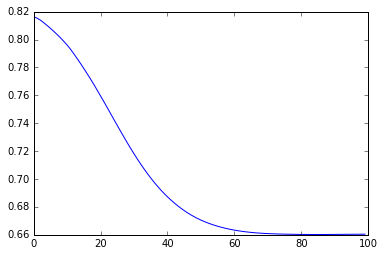

In [91]:
__author__ = 'mike bowles'
import pandas as pd
from sklearn.linear_model import ElasticNet, ElasticNetCV
from numpy import linspace
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
#data = urllib2.urlopen(target_url)
#x = []
#y = []

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',';')
x = data.values[:,0:(data.values.shape[1]-1)]


y = data.values[:,-1].reshape(len(x),1)
print(np.shape(y))


# firstLine = True
# for row in data:
# #     if firstLine:
# #         names = row.strip().split(";")
# #         firstLine = False
# #     else:
#     rowSplit = row.strip().split(";")
#     y.append(float(rowSplit.pop()))
#     floatRow = [float(num) for num in rowSplit]
#     x.append(floatRow)

eNetModel = ElasticNetCV(l1_ratio=0.5, normalize=True, cv=5, verbose=0, random_state=None, selection='cyclic')

eNetModel.fit(x,y)

print (eNetModel.alpha_)
print (eNetModel.alphas_)
xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
print (xvalError)

plt.plot(xvalError)
plt.show()

0.000961343240738 best alpha
0.269298877952 R^2 for lambda = 0.01
[  1.49848883e-02  -5.19484404e-01   1.98457276e-01   6.54438278e-03
  -8.22728357e-01  -5.01250257e-05  -1.38094508e-03  -2.38903251e+01
  -6.69923519e-02   3.99246052e-01   1.18249989e-01] coefficients
0.000318282559434 best alpha
0.334676529693 R^2 for lambda = 0.0302040816327
[  2.30630799e-02  -7.60035180e-01   1.72977343e-01   1.36369711e-02
  -1.33498873e+00   1.11088551e-03  -2.14976023e-03  -3.27293030e+01
  -1.24960141e-01   6.40231728e-01   1.82274837e-01] coefficients
0.000190711816989 best alpha
0.347987153177 R^2 for lambda = 0.0504081632653
[  2.64852070e-02  -8.46451178e-01   1.17088030e-01   1.63988786e-02
  -1.52330785e+00   1.86095939e-03  -2.46709603e-03  -3.38613624e+01
  -1.66625382e-01   7.33442641e-01   2.06371187e-01] coefficients
0.00013614398496 best alpha
0.35308668047 R^2 for lambda = 0.070612244898
[  2.83007139e-02  -8.94748211e-01   7.11243589e-02   1.76757579e-02
  -1.61859162e+00   2.342

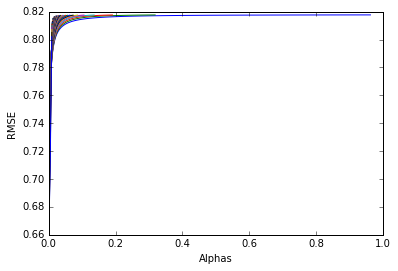

In [94]:
__author__ = 'mike bowles'
import pandas as pd
from sklearn.linear_model import ElasticNet, ElasticNetCV

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
#data = urllib2.urlopen(target_url)
#x = []
#y = []

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',';')
x = data.values[:,0:(data.values.shape[1]-1)]


y = data.values[:,-1]


# firstLine = True
# for row in data:
# #     if firstLine:
# #         names = row.strip().split(";")
# #         firstLine = False
# #     else:
#     rowSplit = row.strip().split(";")
#     y.append(float(rowSplit.pop()))
#     floatRow = [float(num) for num in rowSplit]
#     x.append(floatRow)

for i in linspace(.01,1):
    eNetModel = ElasticNetCV(l1_ratio=i, normalize=True, cv=5, verbose=0, random_state=None, selection='cyclic')

    eNetModel.fit(x,y)

    print (eNetModel.alpha_,'best alpha')

    xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
    print(eNetModel.score(x,y),'R^2 for lambda =',i)
    print(eNetModel.coef_,'coefficients')
    
    
    plt.plot(eNetModel.alphas_,xvalError)
    plt.ylabel('RMSE')
    plt.xlabel('Alphas')


In [93]:
# For L = .2, not much difference from L = .5 (moving close to ridge).

(1599,)
0.000961343240738 best alpha
0.269298877952 R^2 for lambda =  0.01
0.000318282559434 best alpha
0.334676529693 R^2 for lambda =  0.0302040816327
0.000190711816989 best alpha
0.347987153177 R^2 for lambda =  0.0504081632653
0.00013614398496 best alpha
0.35308668047 R^2 for lambda =  0.070612244898
0.000105855772576 best alpha
0.355617372959 R^2 for lambda =  0.0908163265306
8.65915786694e-05 best alpha
0.357066913666 R^2 for lambda =  0.111020408163
7.32594382522e-05 best alpha
0.357922332285 R^2 for lambda =  0.131224489796
6.34849309921e-05 best alpha
0.358534825191 R^2 for lambda =  0.151428571429
5.60116751441e-05 best alpha
0.35896565642 R^2 for lambda =  0.171632653061
5.01125731874e-05 best alpha
0.359279994481 R^2 for lambda =  0.191836734694
4.86140764784e-05 best alpha
0.359383862387 R^2 for lambda =  0.212040816327
4.13935138806e-05 best alpha
0.359697620912 R^2 for lambda =  0.232244897959
4.08326802434e-05 best alpha
0.359747013577 R^2 for lambda =  0.252448979592
4

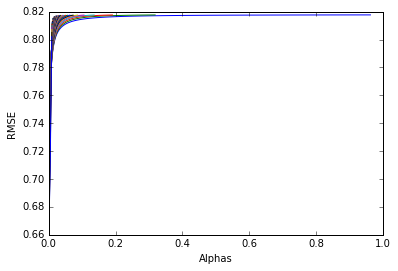

In [85]:
__author__ = 'mike bowles'
import pandas as pd
from sklearn.linear_model import ElasticNet, ElasticNetCV

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
#data = urllib2.urlopen(target_url)
#x = []
#y = []

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',';')
x = data.values[:,0:(data.values.shape[1]-1)]


y = data.values[:,-1]
print(np.shape(y))


# firstLine = True
# for row in data:
# #     if firstLine:
# #         names = row.strip().split(";")
# #         firstLine = False
# #     else:
#     rowSplit = row.strip().split(";")
#     y.append(float(rowSplit.pop()))
#     floatRow = [float(num) for num in rowSplit]
#     x.append(floatRow)

for i in linspace(.01,1):
    eNetModel = ElasticNetCV(l1_ratio=i, normalize=True, cv=5, verbose=0, random_state=None, selection='cyclic')

    eNetModel.fit(x,y)

    print (eNetModel.alpha_,'best alpha')

    xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
    print(eNetModel.score(x,y),'R^2 for lambda = ',i)


    plt.plot(eNetModel.alphas_,xvalError)
    plt.ylabel('RMSE')
    plt.xlabel('Alphas')


In [ ]:
#L = .01, almost equal to ridge regression. We see a difference shape emerge from the error terms.
#Best alpha at 0.000961343240738

0.49141618765 best alpha
0.250524014184 R^2 for not normalized
0.162698602668 best alpha
0.28279073745 R^2 for not normalized
0.0974874218415 best alpha
0.295592051539 R^2 for not normalized
0.0695936219504 best alpha
0.30417949129 R^2 for not normalized
0.0541109959435 best alpha
0.310594773303 R^2 for not normalized
0.0442635904317 best alpha
0.315624014649 R^2 for not normalized
0.0374485119671 best alpha
0.319685470462 R^2 for not normalized
0.032452012392 best alpha
0.323034703337 R^2 for not normalized
0.0286318587335 best alpha
0.325844276271 R^2 for not normalized
0.0256163757392 best alpha
0.328212375266 R^2 for not normalized
0.023175546867 best alpha
0.330190690738 R^2 for not normalized
0.0211593964805 best alpha
0.331875233066 R^2 for not normalized
0.0194659605456 best alpha
0.333321257502 R^2 for not normalized
0.0180234979003 best alpha
0.334571296186 R^2 for not normalized
0.0167800649442 best alpha
0.335658744338 R^2 for not normalized
0.0156971272457 best alpha
0.336

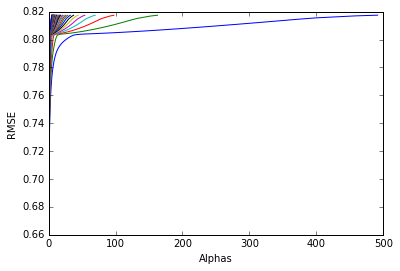

In [82]:
__author__ = 'mike bowles'
import pandas as pd
from sklearn.linear_model import ElasticNet, ElasticNetCV

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
#data = urllib2.urlopen(target_url)
#x = []
#y = []

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',';')
x = data.values[:,0:(data.values.shape[1]-1)]


y = data.values[:,-1]


# firstLine = True
# for row in data:
# #     if firstLine:
# #         names = row.strip().split(";")
# #         firstLine = False
# #     else:
#     rowSplit = row.strip().split(";")
#     y.append(float(rowSplit.pop()))
#     floatRow = [float(num) for num in rowSplit]
#     x.append(floatRow)


for i in linspace(.01,1):
    eNetModel = ElasticNetCV(l1_ratio=i, normalize=False, cv=5, verbose=0, random_state=None, selection='cyclic')

    eNetModel.fit(x,y)

    print (eNetModel.alpha_,'best alpha')

    xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
    print(eNetModel.score(x,y),"R^2 for not normalized")

    plt.plot(eNetModel.alphas_,xvalError)
    plt.ylabel('RMSE')
    plt.xlabel('Alphas')


In [41]:
# Without normalizing, we see a distinct number of steps until the RMSE has a large drop off.
# the best alpha is 0.0245708093825

In [40]:
len(x[0])

11

## In class coding exercises
1.  Rerun the code above for various values of l1_ratio (named $\lambda$ in the discussion above). 
2.  Rerun the code with normalize=False.  How much difference does that make?
3.  Extract the coefficients corresponding to the best choice of alpha.

## Lab 3.2 - 1
See what kind of performance you can get on the breast cancer prognosis data using ElasticNet.  

In [44]:
#Breast Cancer
h = ['sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape',\
          'marginal_adhesion','single_epithelial_cell_use','bare_nuclei','bland_chromatin','normal_nuceoli','mitosis',\
         'class']
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',\
                           names=h)
#drop sample code number
breast_cancer = breast_cancer.drop('sample_code_number',axis=1)
#find rows with ? and drop
breast_cancer_dropped = breast_cancer[breast_cancer.bare_nuclei.str.contains('\?')==False]
breast_cancer_dropped.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_use,bare_nuclei,bland_chromatin,normal_nuceoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


(683,)
0.202519749629 Best alpha for Lambda =  0.2
0.842730109023 R^2
[ 0.0595178   0.04670389  0.03317542  0.01581139  0.01393153  0.09089762
  0.03315636  0.03688257  0.        ] coefficients
0.140205980513 Best alpha for Lambda =  0.288888888889
0.842767862678 R^2
[ 0.05985652  0.04728622  0.03256115  0.01537102  0.0135615   0.09151303
  0.03314083  0.03697042  0.        ] coefficients
0.107216338039 Best alpha for Lambda =  0.377777777778
0.842783510181 R^2
[ 0.06003531  0.04762994  0.03220298  0.0151296   0.01335606  0.09184975
  0.03312963  0.03701828  0.        ] coefficients
0.0809445412776 Best alpha for Lambda =  0.466666666667
0.8428591096 R^2
[ 0.06037049  0.04759564  0.03192005  0.015091    0.01370778  0.09197405
  0.03345556  0.0370633   0.        ] coefficients
0.0679934146732 Best alpha for Lambda =  0.555555555556
0.842863371234 R^2
[ 0.06044267  0.0477435   0.03176433  0.01499283  0.01362553  0.09210911
  0.03345185  0.03708288  0.        ] coefficients
0.058615012649

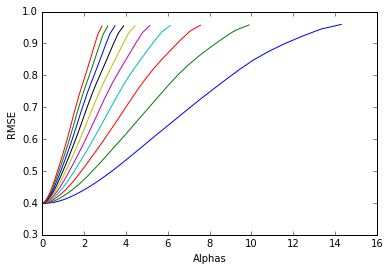

In [95]:
__author__ = 'jonathan hilgart'
import pandas as pd
from sklearn.linear_model import ElasticNet, ElasticNetCV

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
#data = urllib2.urlopen(target_url)
#x = []
#y = []

#data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',';')
x = breast_cancer_dropped.values[:,0:(breast_cancer_dropped.values.shape[1]-1)]


y = breast_cancer_dropped.values[:,-1]
print(np.shape(y))


# firstLine = True
# for row in data:
# #     if firstLine:
# #         names = row.strip().split(";")
# #         firstLine = False
# #     else:
#     rowSplit = row.strip().split(";")
#     y.append(float(rowSplit.pop()))
#     floatRow = [float(num) for num in rowSplit]
#     x.append(floatRow)

for i in linspace(.2,1,10):
    eNetModel = ElasticNetCV(l1_ratio=i, normalize=False, cv=5, verbose=0, random_state=None, selection='cyclic')

    eNetModel.fit(x,y)

    print (eNetModel.alpha_, 'Best alpha for Lambda = ',i)
    #print (eNetModel.alphas_,'alphas')
    xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
    
    print(eNetModel.score(x,y),'R^2')
    #print (xvalError,'x val error') #MSE
    print(eNetModel.coef_,'coefficients')

    plt.plot(eNetModel.alphas_,xvalError)
    plt.ylabel('RMSE')
    plt.xlabel('Alphas')
